<a href="https://colab.research.google.com/github/frm1789/100DaysOfPython/blob/main/Coursera_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
!pip install patchworklib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.8 MB/s eta 0:00:00


In [3]:
import patchworklib as pw

<Figure size 100x100 with 0 Axes>

In [4]:
df = pd.read_csv('udemy_courses.csv')


In [5]:
df['year'] = pd.DatetimeIndex(df['published_timestamp']).year
df['month'] = pd.DatetimeIndex(df['published_timestamp']).month

In [6]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['month_year'] = df['published_timestamp'].dt.to_period('M')

In [7]:
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,month_year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017,1,2017-01
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017,3,2017-03
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016,12,2016-12


In [53]:
total_subscribers_paid = df[df['is_paid'] == True]['num_subscribers'].sum()
total_reviews_paid = df[df['is_paid'] == True]['num_reviews'].sum()
total_subscribers_paid/total_reviews_paid

18.486354795643834

In [55]:
total_subscribers_no_paid = df[df['is_paid'] == False]['num_subscribers'].sum()
total_reviews_no_paid = df[df['is_paid'] == False]['num_reviews'].sum()
total_subscribers_no_paid/total_reviews_no_paid

27.079514988109484

In [32]:
level_counts_month_year_by_subject = df.groupby(['subject', 'month_year']).size().unstack(fill_value=0)
level_counts_month_year_by_subject

month_year,2011-07,2011-09,2011-11,2011-12,2012-01,2012-02,2012-04,2012-05,2012-06,2012-07,...,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07
subject,,,,,,,,,,,,,,,,,,,,,
Business Finance,0,0,0,0,0,0,0,0,1,0,...,27,23,36,22,33,32,36,50,37,15
Graphic Design,0,0,0,0,0,0,2,2,2,1,...,10,14,15,12,24,28,25,34,26,6
Musical Instruments,0,0,0,0,1,0,0,0,2,1,...,20,13,17,8,15,23,14,31,16,5
Web Development,1,1,2,1,0,1,2,3,3,1,...,40,47,33,41,42,29,30,38,41,2


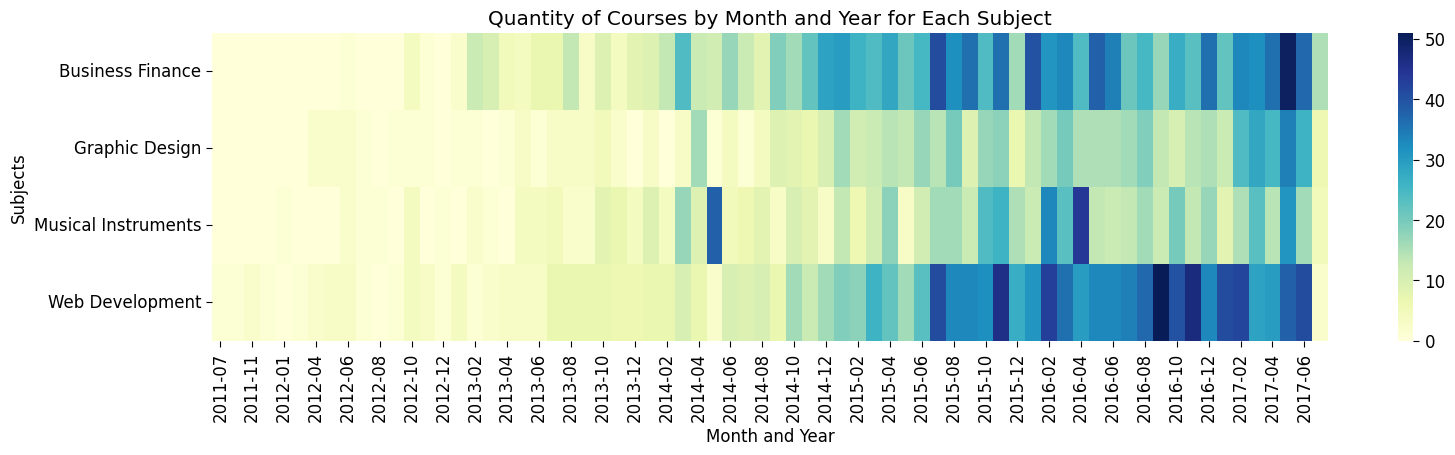

In [11]:
plt.figure(figsize=(18, 4))
sns.heatmap(data=level_counts_month_year_by_subject, annot=False, fmt="d", cmap="YlGnBu", cbar=True)
sns.despine(left=True, bottom=True)
plt.xlabel("Month and Year")
plt.ylabel("Subjects")
plt.title("Quantity of Courses by Month and Year for Each Subject")
plt.show()

In [12]:
df.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
year                                 int64
month                                int64
month_year                       period[M]
dtype: object

In [13]:
df.isna().sum()


course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
year                   0
month                  0
month_year             0
dtype: int64

In [14]:
df.subject.unique()


array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [15]:
# Count the number of occurrences of each subject
subject_counts = df['subject'].value_counts()

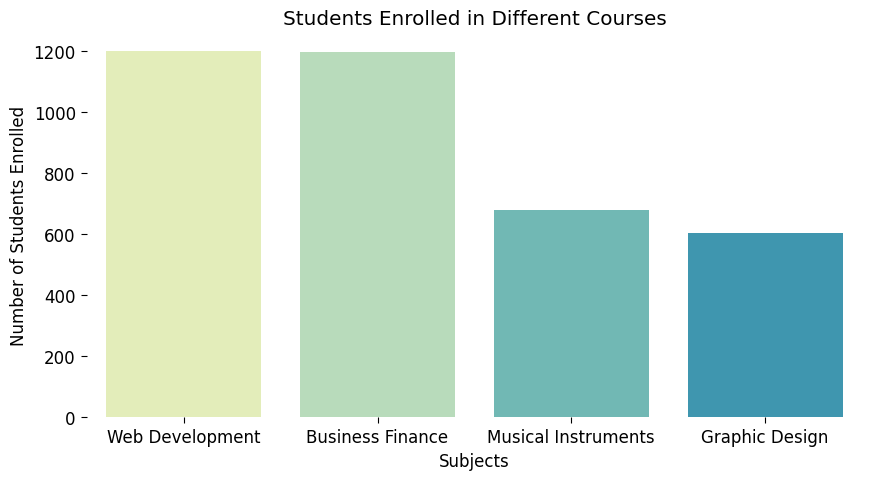

In [16]:
plt.figure(figsize=(10, 5))

sns.barplot(x=subject_counts.index, y=subject_counts.values, palette=sns.color_palette("YlGnBu"))
sns.despine(left=True, bottom=True)
plt.xlabel("Subjects")
plt.ylabel("Number of Students Enrolled")
plt.title("Students Enrolled in Different Courses")

plt.show()

In [17]:
subject_counts = df['subject'].value_counts()
subject_counts_by_paid = df.groupby(['subject', 'is_paid']).size().unstack(fill_value=0)

<Figure size 1600x500 with 0 Axes>

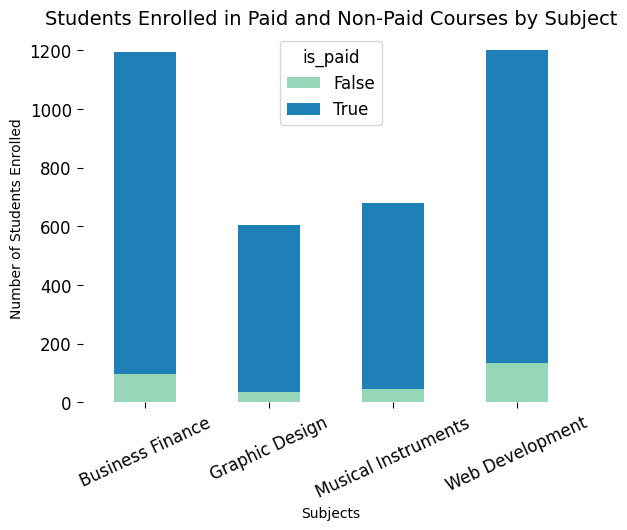

In [18]:
plt.figure(figsize=(16, 5))
# Get two colors from the "YlGnBu" palette
ylgnbu_palette = sns.color_palette("YlGnBu", 2)

# Create a stacked bar plot using Seaborn with the selected colors
subject_counts_by_paid.plot(kind='bar', stacked=True, color=ylgnbu_palette)
sns.despine(left=True, bottom=True)
plt.xlabel("Subjects", fontsize=10)
plt.xticks(rotation=25)
plt.ylabel("Number of Students Enrolled", fontsize=10)
plt.title("Students Enrolled in Paid and Non-Paid Courses by Subject", fontsize=14)
plt.show()



In [19]:
# Level vs. subject
# Is it more probably that you pay more for a course in Web Development vs Musical Instruments?
# The level of the courses are highers in Web Development vs Musical Instruments

In [20]:
# Count the number of occurrences of each subject / paid courses
level_counts = df['level'].value_counts()

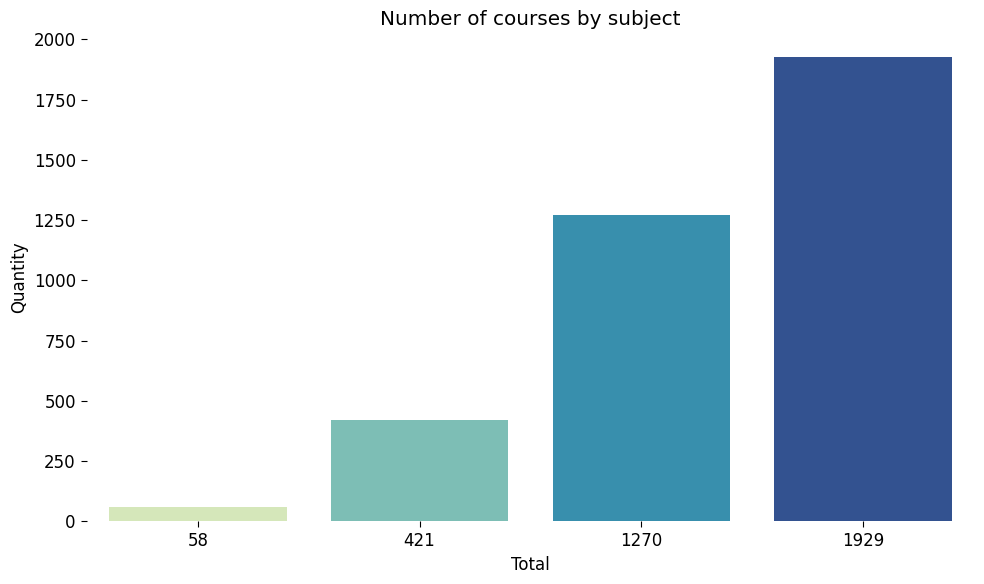

In [21]:

sns.set_palette("Set2")

# Create a violin plot with custom aesthetics
plt.figure(figsize=(10, 6))
sns.barplot(data=level_counts, y=level_counts.values, x=level_counts.index, palette="YlGnBu")
sns.despine(left=True, bottom=True)

# Customize labels and title
plt.xlabel('Total')
plt.ylabel("Quantity")
plt.title("Number of courses by subject")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
level_counts.index

Index(['All Levels', 'Beginner Level', 'Intermediate Level', 'Expert Level'], dtype='object')

In [23]:
level_counts_by_subject = df.groupby(['subject', 'level']).size().unstack(fill_value=0)
level_counts_by_subject

level,All Levels,Beginner Level,Expert Level,Intermediate Level
subject,,,,
Business Finance,696,340,31,128
Graphic Design,298,243,5,57
Musical Instruments,276,296,7,101
Web Development,659,391,15,135


In [24]:

x = np.arange(len(level_counts))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

In [25]:
level_counts_by_subject.index

Index(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'],
      dtype='object', name='subject')

In [26]:
level_counts_by_subject = level_counts_by_subject.T

<Figure size 1600x600 with 0 Axes>

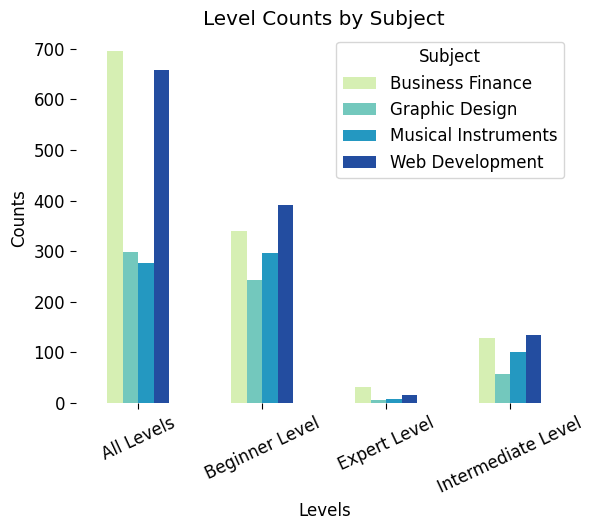

In [27]:
# Plot the data as a bar plot

# Create a violin plot with custom aesthetics
plt.figure(figsize=(16, 6))
ylgnbu_palette = sns.color_palette("YlGnBu", 4)
bar_width = 0.8

level_counts_by_subject.plot(kind='bar', stacked=False, color=ylgnbu_palette)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=25)
# Add labels and a legend
plt.xlabel('Levels')
plt.xticks(x, level_counts_by_subject.index)
plt.ylabel('Counts')
plt.title('Level Counts by Subject')
plt.legend(title='Subject')

# Show the plot
plt.show()

In [29]:
level_counts_by_subject_pct = round(level_counts_by_subject.div(level_counts_by_subject.sum(axis=1), axis=0)*100,2)
level_counts_by_subject_pct

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
level,,,,
All Levels,36.08,15.45,14.31,34.16
Beginner Level,26.77,19.13,23.31,30.79
Expert Level,53.45,8.62,12.07,25.86
Intermediate Level,30.40,13.54,23.99,32.07


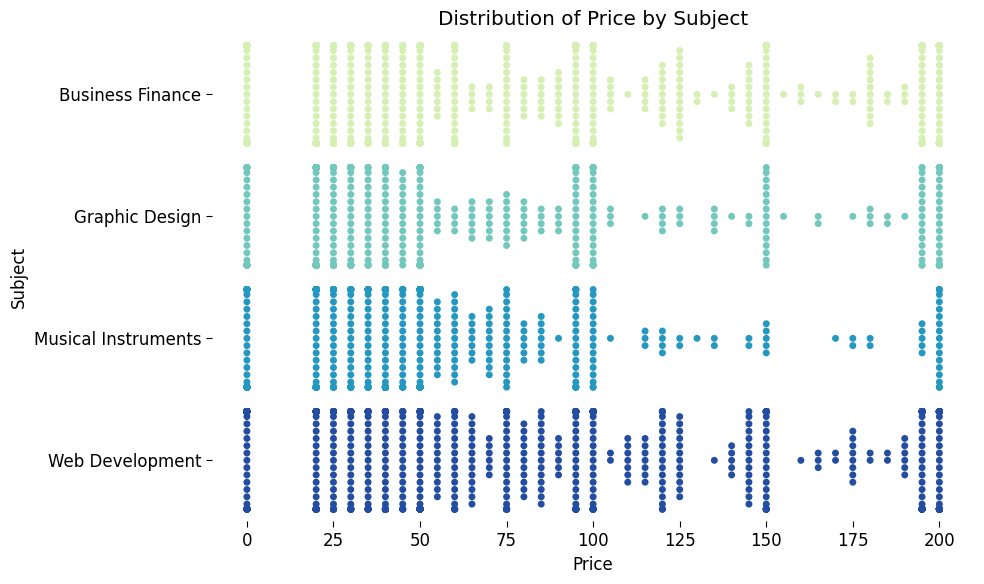

In [30]:
sns.set_palette("Set2")

# Create a violin plot with custom aesthetics
plt.figure(figsize=(10, 6))
sns.swarmplot(x=df["price"], y=df["subject"], palette="YlGnBu")
sns.despine(left=True, bottom=True)

# Customize labels and title
plt.xlabel("Price")
plt.ylabel("Subject")
plt.title("Distribution of Price by Subject")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

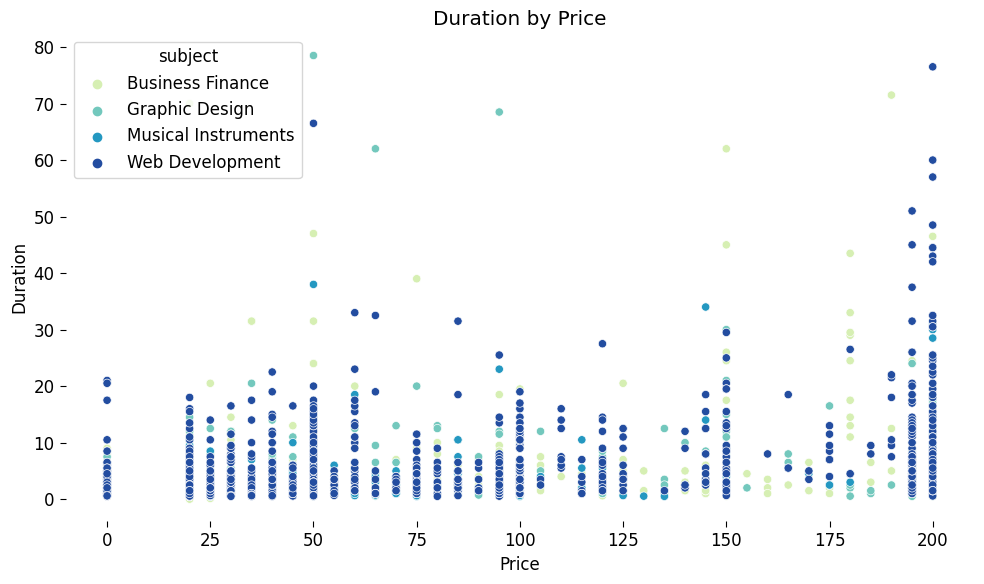

In [31]:
sns.set_palette("Set2")

# Create a violin plot with custom aesthetics
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, hue="subject", y='content_duration', x="price", palette="YlGnBu")
sns.despine(left=True, bottom=True)

# Customize labels and title
plt.xlabel("Price")
plt.ylabel("Duration")
plt.title("Duration by Price")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# There are more reviews by level
# Monthly reviews count are highers for older courses.